## Convert paradigm epochs to current format

In [ ]:
import pandas as pd
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatN/Day2/RatN_Day2_2019-10-11_03-58-54_epochs.npy"

data = np.load(file, allow_pickle=True).item()

epochs = pd.DataFrame(data)
a = epochs.T.reset_index()

epochs_new = pd.DataFrame(
    {"start": a[0], "stop": a[1], "label": a["index"].str.lower()}
)
metadata = None

data = {"epochs": epochs_new, "metadata": metadata}

# np.save(file[:-11] + ".paradigm.npy", data)


In [ ]:
import numpy as np
import h5py
from pathlib import Path
import pandas as pd
from scipy.io import loadmat

source_dir = Path("/home/bapung/Documents")
file = source_dir / "Test3.mat"
data = loadmat(file)

arr = data["results0"]["responserate"]
arr = arr.astype("float").squeeze()
print(arr)


In [139]:
import numpy as np


file1 = '/data/Clustering/sessions/RatS/Day3SD/spykcirc/RatS_Day3SD_2020-11-29_07-53-30.GUI/pc_features.npy'

file2 = '/data/Clustering/sessions/RatS/Day3SD/spykcirc/RatS_Day3SD_2020-11-29_07-53-30.GUI/pc_feature_ind.npy'

pc_features = np.load(file1,mmap_mode='r')
pc_feature_ind = np.load(file2)

In [151]:
a

array([0, 1, 2, 3, 4])

In [146]:
a = np.arange(5)
mask_ind = np.logical_or(a<2,a>3)
b = np.ma.array(a,mask=mask_ind)

In [154]:
np.ma.where(b<3)[0]

array([2])

In [143]:
np.logical_or(a<2,a>3)

array([ True,  True, False, False,  True])

In [138]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [137]:
x = np.array([1,3,5,6,7])
y = np.array([2,7,5,1])
np.intersect1d(x,y,assume_unique=True,return_indices=True)

(array([1, 5, 7]), array([0, 2, 4]), array([3, 2, 1]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
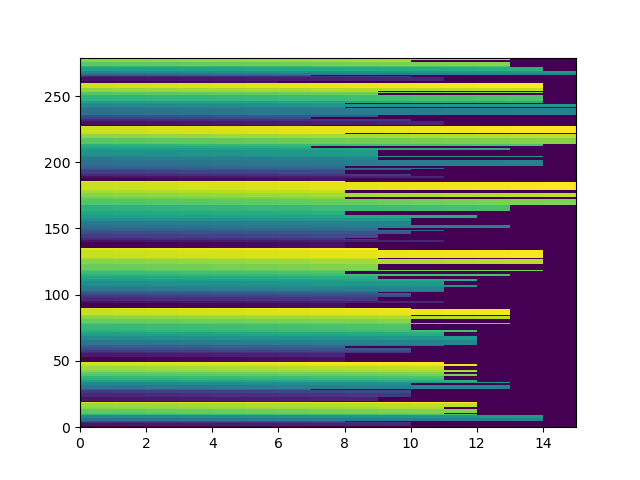

In [76]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.pcolormesh(pc_feature_ind)

In [ ]:
pc_features.shape

In [90]:
chan ='/data/Clustering/sessions/RatS/Day3SD/spykcirc/RatS_Day3SD_2020-11-29_07-53-30.GUI/channel_map.npy'

data = np.load(chan)

In [72]:
y

array([ 144.,  128.,  112.,   80.,   64.,   32.,   16.,    0.,  560.,
        544.,  528.,  512.,  496.,  480.,  464.,  448.,  432.,  416.,
        400.,  944.,  928.,  912.,  896.,  880.,  864.,  848.,  832.,
        816.,  800., 1360., 1344., 1328., 1312., 1296., 1280., 1248.,
       1232., 1216., 1200., 1760., 1744., 1712., 1696., 1680., 1664.,
       1648., 1632., 1616., 1600., 2640., 2624., 2608., 2576., 2560.,
       2544., 2528., 2512., 2496., 2480., 2464., 2432., 2416., 2400.,
       3040., 3024., 3008., 2992., 2976., 2960., 2944., 2928., 2912.,
       2896., 2880., 2864., 2848., 2832., 2816., 2800., 3440., 3424.,
       3408., 3392., 3376., 3360., 3344., 3328., 3312., 3296., 3280.,
       3264., 3248., 3232., 3216., 3200., 3840., 3824., 3808., 3792.,
       3776., 3760., 3744., 3728., 3712., 3696., 3680., 3664., 3632.,
       3616., 3600., 4240., 4224., 4208., 4192., 4176., 4160., 4144.,
       4128., 4112., 4096., 4080., 4064., 4048., 4016., 4000., 4640.,
       4624., 4608.,

In [74]:
data[:,0][None,:].shape

(1, 173)

In [65]:
a = data[:,0][:,np.newaxis]- data[:,0][np.newaxis,:]
b = data[:,1][:,np.newaxis]- data[:,1][np.newaxis,:]

dist = np.sqrt(a**2 + b**2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
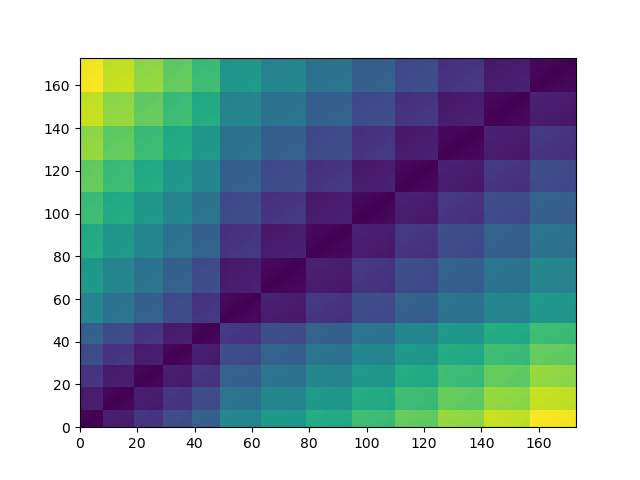

In [67]:
%matplotlib widget

plt.pcolormesh(dist)

In [ ]:
%matplotlib qt
import matplotlib.pyplot as plt

source_dir = Path("/home/bapung/Documents")
subject_files = [source_dir/'Test.mat',source_dir/'Test2.mat'] 

#objective: 2 figure window with 2 subplots
n_vars =2 

for i in n_vars:
    fig, axs = plt.subplots(1, 2, num=i)
    axs = axs.reshape(-1)
    for i1,file in enumerate(subject_files):
        data = loadmat(file)
        arr = data['results0']['responserate']
        axs[i1].plot(subjects_info[sub_name][var])
        axs[i1].set_xlabel('Trials')

In [ ]:
sess.ripple.metadata


In [ ]:
%matplotlib widget
import subjects
import numpy as np
from scipy.signal import fftconvolve
from neuropy.utils.signal_process import TimeFrequency
from neuropy import plotting

sess = subjects.sd.ratSday3[0]
post = sess.paradigm['post'].flatten()
rpl = sess.ripple.time_slice(post[0],post[1])[5].flatten()
signal = sess.eegfile.get_signal(163,rpl[0],rpl[1])

wvlt = TimeFrequency(signal,np.arange(150,250),method='wavelet',ncycles=7)

plotting.plot_signal_heatmap(wvlt)




In [ ]:
from scipy.linalg import block_diag
import numpy as np
import subjects

sess = subjects.sd.ratSday3[0]

wav = sess.neurons.waveforms

a = np.arange(25).reshape(5, 5)
b = np.arange(12).reshape(4, 3)

block_diag(*[wav, wav])


In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from neuropy.plotting import plot_waveforms
import subjects

sess = subjects.sd.ratSday3[0]
shank_ids = sess.neurons.shank_ids
sort_ind = np.argsort(shank_ids)[::-1]
plot_waveforms(sess.neurons,sort_order=sort_ind,color='g')

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from neuropy.plotting import plot_waveforms
import subjects

sess = subjects.sd.ratSday3[0]
wav = sess.neurons.waveforms

a1,b1 = wav[20],wav[25]
b1 = np.where(b1!=0,b1,np.nan)
# plot_wv = a1
corr = np.corrcoef(a1.astype('float'),b1.astype('float'))
# plt.imshow(corr[173:,:173])
# plt.plot(b1.T+np.linspace(0,500,a1.shape[0]))

In [ ]:
waveforms = sess.neurons.waveforms
# waveforms = np.where(waveforms!=0,waveforms,np.nan)
mx = np.ma.masked_equal(waveforms, value=0)
waveforms = np.ma.reshape(mx, (sess.neurons.n_neurons, -1)).astype(float)
similarity = np.ma.corrcoef(waveforms)
np.fill_diagonal(similarity, 0)


In [ ]:
import numpy as np

bins = np.arange(-1, 1, 0.001)
hist_sim = np.histogram(np.arange(100), bins=bins)[0]


In [ ]:
%matplotlib widget
# plt.imshow(similarity[np.ix_(sort_ind,sort_ind)])
plt.plot(hist_sim)

In [ ]:
import numpy as np
import subjects
from neuropy import analyses, plotting

sess = subjects.sd.utkuAG_day2[0]

signal = sess.eegfile.get_signal(channel_indx=np.arange(24))
rpls = analyses.oscillations.detect_ripple_epochs(
    signal,
    sess.recinfo.channel_groups[:4],
    ignore_epochs=sess.artifact,
    mergedist=0.005,
    maxdur=0.600,
)
rpls.filename = sess.filePrefix.with_suffix(".ripple")
rpls.save()

# signal = sess.eegfile.get_signal([1])
# artifact_epochs = analyses.detect_artifact_epochs(signal, thresh=9)
# artifact_epochs.filename = sess.filePrefix.with_suffix(".artifact.npy")
# artifact_epochs.save()
# plotting.plot_artifact_epochs(artifact_epochs, signal)


In [ ]:
sess.paradigm.to_dataframe()


In [ ]:
sess.recinfo.write_epochs(sess.ripple)


In [ ]:
%matplotlib widget

plotting.plot_artifact_epochs(artifact_epochs,signal)

## Convert artifact to current format

In [ ]:
import pandas as pd
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatS/Day3SD/RatS_Day3SD_2020-11-29_07-53-30.artifact.npy"

data = np.load(file, allow_pickle=True).item()

epochs = pd.DataFrame(
    {"start": data["time"][:, 0], "stop": data["time"][:, 1], "label": ""}
)
metadata = {"channels": data["channel"], "thresh": data["threshold"]}
data = {"epochs": epochs, "metadata": metadata}

# np.save(file, data)


In [ ]:
import numpy as np

file = "/home/bapung/Documents/ClusteringHub/spykcirc/RatV/RatVDay2SD/RatV_Day2SD_2021-10-04_08-02-10-1.GUI/amplitudes.npy"

amp = np.load(file)


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot(amp)

In [ ]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
#x and y arrays for definining an initial function
x = np.linspace(0, 10, 100)
y = np.exp(x**0.5) * np.sin(5*x)
# Plotting
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,y, color = 'b')
ax.grid()
# Defining the cursor
cursor = Cursor(ax, horizOn=True, vertOn=True, useblit=True,
                color = 'r', linewidth = 1)
# Creating an annotating box
annot = ax.annotate("", xy=(0,0), xytext=(-40,40),textcoords="offset points",
                    bbox=dict(boxstyle='round4', fc='linen',ec='k',lw=1),
                    arrowprops=dict(arrowstyle='-|>'))
annot.set_visible(False)
# Function for storing and showing the clicked values
coord = []
def onclick(event):
    global coord
    coord.append((event.xdata, event.ydata))
    x = event.xdata
    y = event.ydata
    
    # printing the values of the selected point
    print([x,y]) 
    annot.xy = (x,y)
    text = "({:.2g}, {:.2g})".format(x,y)
    # annot.set_text(text)
    # annot.set_visible(True)
    ax.plot(3,4,'o')
    fig.canvas.draw() #redraw the figure
    
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
# Unzipping the coord list in two different arrays
if len(coord)>1:
    x1, y1 = zip(*coord)
    print(x1, y1)

In [ ]:
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_click(event):
    if event.button is MouseButton.LEFT:
        # print(f'{event.xdata} {event.ydata}')
        # ax.plot(event.xdata,event.ydata,'r',lw=20)
        global coord
        coord.append((event.xdata, event.ydata))
        x = event.xdata
        y = event.ydata

        # printing the values of the selected point
        # print([x,y])
        annot.xy = (x, y)
        text = "({:.2g}, {:.2g})".format(x, y)
        # annot.set_text(text)
        # annot.set_visible(True)
        ax.plot(x, y, "o", color="r")
        fig.canvas.draw()  # redraw the figure

        # plt.disconnect(binding_id)


fig.canvas.mpl_connect("button_press_event", on_click)


In [ ]:
from spikeextractors import BinDatRecordingExtractor

a = BinDatRecordingExtractor(file, sampling_frequency=1250, numchan=134, dtype="int16")
a._epochs


In [ ]:
import numpy as np

from bokeh.plotting import figure, output_file, show

output_notebook()

ramp = np.array([np.linspace(0, 10, 200)] * 20)
steps = np.array([np.linspace(0, 10, 10)] * 20)
bitmask = np.random.rand(25, 10) > 0.5

data = dict(
    image=[ramp, steps, bitmask],
    squared=[ramp ** 2, steps ** 2, bitmask ** 2],
    pattern=["smooth ramp", "steps", "bitmask"],
    x=[0, 0, 25],
    y=[5, 20, 5],
    dw=[20, 20, 10],
    dh=[10, 10, 25],
)

TOOLTIPS = [
    ("name", "$name"),
    ("index", "$index"),
    ("pattern", "@pattern"),
    ("x", "$x"),
    ("y", "$y"),
    ("value", "@image"),
    ("squared", "@squared"),
]

p = figure(
    x_range=(0, 35), y_range=(0, 35), tools="hover,wheel_zoom", tooltips=TOOLTIPS
)
p.image(
    source=data,
    image="image",
    x="x",
    y="y",
    dw="dw",
    dh="dh",
    palette="Inferno256",
    name="Image Glyph",
)

show(p)


In [ ]:
from bokeh.plotting import ColumnDataSource, figure, output_notebook, show
import numpy as np
from PIL import Image
from io import BytesIO
from matplotlib import cm

output_notebook()
from base64 import b64decode, b64encode
import matplotlib.pyplot as plt
from skimage import img_as_ubyte


def to_png(arr):
    out = BytesIO()
    im = Image.fromarray(arr)
    im.save(out, format="png")
    return out.getvalue()


def b64_image_files(images, colormap="magma"):
    cmap = cm.get_cmap(colormap)
    urls = []
    for im in images:
        png = to_png(img_as_ubyte(cmap(im)))
        url = "data:image/png;base64," + b64encode(png).decode("utf-8")
        urls.append(url)
    return urls


out = BytesIO()
a = np.arange(25).reshape(5, 5)
a = a / 25
# encoded = b64decode(a)
# mime = "image/jpeg"

filenames = b64_image_files([image])
# uri = "data:%s;base64,%s" % (mime, encoded)
# im = plt.imshow(a)

# im = Image.fromarray(a)
# im.save(out,format='png')

# im = Image.fromarray(np.uint8(cm.gist_earth(a)*255))
# img = out.getvalue()

source = ColumnDataSource(
    data=dict(
        x=[0.5, 1, 1, 1, 1],
        y=[1.5, 2, 2, 2, 2],
        desc=["A", "b", "C", "d", "E"],
        imgs=[
            filenames,
            "https://docs.bokeh.org/static/snake2.png",
            "https://docs.bokeh.org/static/snake3D.png",
            "https://docs.bokeh.org/static/snake4_TheRevenge.png",
            "https://docs.bokeh.org/static/snakebite.jpg",
        ],
        fonts=[
            "<i>italics</i>",
            "<pre>pre</pre>",
            "<b>bold</b>",
            "<small>small</small>",
            "<del>del</del>",
        ],
    )
)

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="180" alt="@imgs" width="180"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span>@fonts{safe}</span>
        </div>
        # <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(width=400, height=400, tooltips=TOOLTIPS, title="Mouse over the dots")

p.circle("x", "y", size=20, source=source)

show(p)


In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
width, height = fig.get_size_inches() * fig.get_dpi()
canvas = FigureCanvas(fig)
ax = fig.gca()

ax.text(0.0, 0.0, "Test", fontsize=45)
ax.axis("off")

canvas.draw()  # draw the canvas, cache the renderer

image = np.frombuffer(canvas.tostring_rgb(), dtype="uint8")
image = image.reshape(height.astype(int), width.astype(int), 3)[:, :, 1]


In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

x = [1, 2, 3, 4]
y = [6, 7, 2, 4]
p = figure(title="Sample line")
p.line(x, y)
show(p)


In [ ]:
import numpy as np
from pathlib import Path

file = Path("/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/params.py")

params = {}
with file.open("r") as f:
    for line in f:
        line_values = (
            line.replace("\n", "").replace('r"', '"').replace('"', "").split("=")
        )
        params[line_values[0].strip()] = line_values[1].strip()


params


In [ ]:
import pandas as pd
from pathlib import Path

file = Path("/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/cluster_info.tsv")
data = pd.read_csv(file, delimiter="\t")
a = data[data["group"].isin(["mua", "good"])].reset_index(drop=True)

b = np.arange(10)
for i in data.itertuples():
    np.where(b == i.id)


In [ ]:
from pathlib import Path
from neuropy.io import PhyIO
from neuropy.core import Neurons

phy_data = PhyIO(
    Path(
        "/home/bapung/Documents/ClusteringHub/spykcirc/RatR/Day2SD/Allsession/RatR_Day2SD_2021-05-23_09-07-18-1.GUI"
    )
)

neurons = Neurons(
    phy_data.spiketrains, t_stop=53000, t_start=0, sampling_rate=phy_data.sampling_rate
)


In [ ]:
import numpy as np
from neuropy.core import Position


x = np.random.randn(10)
y = np.random.randn(10)
z = np.random.randn(10)
t = np.arange(0, 10)

pos = Position(t, x, y, z, sampling_rate=1)


In [ ]:
import numpy as np
from neuropy.core import Mua

mua = Mua(spike_counts=np.array([1, 2, 3]), bin_size=0.2)


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

file1 = '/data/Clustering/sessions/RatS/Day2NSD/RatS-Day2NSD-2020-11-27_10-22-29_position.npy'
file2 = '/data/Clustering/sessions/RatS/Day2NSD/RatS-Day2NSD-2020-11-27_10-22-29.position.npy'

data1 = np.load(file1,allow_pickle=True).item()
data2 = np.load(file2,allow_pickle=True).item()


plt.plot(data1['x'])
plt.plot(data2['traces'][1])

In [ ]:
import numpy as np

file = "/data/Clustering/sessions/RatN/Day2/2019-10-11_03-58-54/experiment1/recording1/continuous/Rhythm_FPGA-100.0/timestamps.npy"

data = np.load(file)


In [ ]:
fileName = (
    "/data/Clustering/sessions/RatN/Day2/position/Take 2019-10-11 04.08.48 AM.fbx"
)

with open(fileName) as f:
    next(f)
    for i, line in enumerate(f):

        m = "".join(line)

        if "KeyCount" in m:
            print(m)
            # print("break at i = " + str(i))
            # line_frame = linecache.getline(fileName, i + 2).strip().split(" ")
            break


In [ ]:
import numpy as np

file = "/data/Clustering/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38.paradigm.npy"

data = np.load(file, allow_pickle=True).item()
data["epochs"]


In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

file_name = "RatU_Day4SD_2021-07-29_08-23-06.eeg_sample.eeg"
n_channels = 192 # number of recorded channels in the file
sampling_rate = 1250
# reading data from binary file and reshaping to n_channels x time format
data = np.memmap(file_name,dtype='int16',mode='r').reshape(-1,n_channels).T

#let's plot data from first channel
plt.plot(data[0])


In [ ]:
%matplotlib widget
import numpy as np
from neuropy.plotting import Fig

def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc

figure = Fig()
fig,gs = figure.draw(grid=(4,4))

ax = figure.add_subplot(gs[:,2:])
ax.plot(np.arange(10),np.arange(10))

subfig = fig.add_subfigure(gs[:,:2])
axsLeft = subfig.subplots(1, 2, sharey=True)
subfig.set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfig.suptitle('Left plots', fontsize='x-large')
subfig.colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

In [ ]:
import numpy as np

from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, CustomJS, ColumnDataSource

N = 20
x = np.random.random(size=N)
y = np.random.random(size=N)

p = figure(tools=["hover"], toolbar_location=None)
p.scatter(x, y, size=10)

img_x = np.linspace(0, 10, N)
img_y = np.linspace(0, 10, N)

images = []
for a, b in zip(x, y):
    xx, yy = np.meshgrid(x, y)
    d = np.sin(a * xx) * np.cos(b * yy)
    images.append(d)

imgs_source = ColumnDataSource(data=dict(images=images))
img_source = ColumnDataSource(data=dict(image=[]))

img = figure(x_range=(0, 10), y_range=(0, 10), tools=[], toolbar_location=None)
img.image(image="image", x=0, y=0, dw=10, dh=10, source=img_source, palette="Greys7")

hover = p.select_one(HoverTool)
hover.callback = CustomJS(
    args=dict(imgs_source=imgs_source, img_source=img_source),
    code="""
var indices = cb_data.index['1d'].indices;
if (indices.length > 0) {
    var img = imgs_source.data.images[indices[0]];
    img_source.data = {image: [img]};
} else {
    img_source.data = {image: []};
}
""",
)
hover.tooltips = None

output_file("linked_hover.html")
show(p)


In [ ]:
import base64
from math import cos, pi, sin

from bokeh.colors.named import firebrick, lightgray, orchid, seagreen, skyblue, tomato
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models import (
    AnnularWedge,
    ColumnDataSource,
    ImageURL,
    Plot,
    Range1d,
    Text,
    Wedge,
)
from bokeh.resources import INLINE
from bokeh.sampledata.browsers import browsers_nov_2013, icons
from bokeh.util.browser import view

df = browsers_nov_2013

xdr = Range1d(start=-2, end=2)
ydr = Range1d(start=-2, end=2)

plot = Plot(x_range=xdr, y_range=ydr, width=800, height=800)
plot.title.text = "Web browser market share (November 2013)"
plot.toolbar_location = None

colors = {
    "Chrome": seagreen,
    "Firefox": tomato,
    "Safari": orchid,
    "Opera": firebrick,
    "IE": skyblue,
    "Other": lightgray,
}

aggregated = df.groupby("Browser").agg(sum)
selected = aggregated[aggregated.Share >= 1].copy()
selected.loc["Other"] = aggregated[aggregated.Share < 1].sum()
browsers = selected.index.tolist()

radians = lambda x: 2 * pi * (x / 100)
angles = selected.Share.map(radians).cumsum()

end_angles = angles.tolist()
start_angles = [0] + end_angles[:-1]

browsers_source = ColumnDataSource(
    dict(
        start=start_angles,
        end=end_angles,
        colors=[colors[browser] for browser in browsers],
    )
)

glyph = Wedge(
    x=0,
    y=0,
    radius=1,
    line_color="white",
    line_width=2,
    start_angle="start",
    end_angle="end",
    fill_color="colors",
)
plot.add_glyph(browsers_source, glyph)


def polar_to_cartesian(r, start_angles, end_angles):
    cartesian = lambda r, alpha: (r * cos(alpha), r * sin(alpha))
    points = []

    for start, end in zip(start_angles, end_angles):
        points.append(cartesian(r, (end + start) / 2))

    return zip(*points)


first = True

for browser, start_angle, end_angle in zip(browsers, start_angles, end_angles):
    versions = df[(df.Browser == browser) & (df.Share >= 0.5)]
    angles = versions.Share.map(radians).cumsum() + start_angle
    end = angles.tolist() + [end_angle]
    start = [start_angle] + end[:-1]
    base_color = colors[browser]
    fill = [base_color.lighten(i * 0.05).to_hex() for i in range(len(versions) + 1)]
    # extra empty string accounts for all versions with share < 0.5 together
    text = [
        number if share >= 1 else ""
        for number, share in zip(versions.VersionNumber, versions.Share)
    ] + [""]
    x, y = polar_to_cartesian(1.25, start, end)

    source = ColumnDataSource(dict(start=start, end=end, fill=fill))
    glyph = AnnularWedge(
        x=0,
        y=0,
        inner_radius=1,
        outer_radius=1.5,
        start_angle="start",
        end_angle="end",
        line_color="white",
        line_width=2,
        fill_color="fill",
    )
    plot.add_glyph(source, glyph)

    text_angle = [(start[i] + end[i]) / 2 for i in range(len(start))]
    text_angle = [
        angle + pi if pi / 2 < angle < 3 * pi / 2 else angle for angle in text_angle
    ]

    text_source = ColumnDataSource(dict(text=text, x=x, y=y, angle=text_angle))
    glyph = Text(
        x="x",
        y="y",
        text="text",
        angle="angle",
        text_align="center",
        text_baseline="middle",
        text_font_size="11px",
    )
    plot.add_glyph(text_source, glyph)


def to_base64(png):
    return "data:image/png;base64," + base64.b64encode(png).decode("utf-8")


urls = [to_base64(icons.get(browser, b"")) for browser in browsers]
x, y = polar_to_cartesian(1.7, start_angles, end_angles)

icons_source = ColumnDataSource(dict(urls=urls, x=x, y=y))
glyph = ImageURL(url="urls", x="x", y="y", anchor="center")
plot.add_glyph(icons_source, glyph)

text = ["%.02f%%" % value for value in selected.Share]
x, y = polar_to_cartesian(0.7, start_angles, end_angles)

text_source = ColumnDataSource(dict(text=text, x=x, y=y))
glyph = Text(x="x", y="y", text="text", text_align="center", text_baseline="middle")
plot.add_glyph(text_source, glyph)

doc = Document()
doc.add_root(plot)
doc.validate()

filename = "donut.html"
with open(filename, "w") as f:
    f.write(file_html(doc, INLINE, "Donut Chart"))
print("Wrote %s" % filename)
view(filename)


In [ ]:
from ephyviewer import mkQApp, MainViewer, TraceViewer, TimeFreqViewer
from ephyviewer import InMemoryAnalogSignalSource
import ephyviewer
import numpy as np


# you must first create a main Qt application (for event loop)
app = mkQApp()

# create fake 16 signals with 100000 at 10kHz
sigs = np.random.rand(100000, 16)
sample_rate = 1000.0
t_start = 0.0

# Create the main window that can contain several viewers
win = MainViewer(debug=True, show_auto_scale=True)

# Create a datasource for the viewer
# here we use InMemoryAnalogSignalSource but
# you can alose use your custum datasource by inheritance
source = InMemoryAnalogSignalSource(sigs, sample_rate, t_start)

# create a viewer for signal with TraceViewer
view1 = TraceViewer(source=source, name="trace")
view1.params["scale_mode"] = "same_for_all"
view1.auto_scale()
win.add_view(view1)

sigs = np.random.rand(100000, 16)
sample_rate = 1200.0
t_start = 30.0

source2 = InMemoryAnalogSignalSource(sigs, sample_rate, t_start)


# create a time freq viewer conencted to the same source
view1 = TraceViewer(source=source2, name="trace2")
view1.params["scale_mode"] = "same_for_all"
view1.auto_scale()

# add them to mainwindow
win.add_view(view1)


# show main window and run Qapp
win.show()
app.exec_()


In [ ]:
import subjects
from neuropy.core import Signal
from neuropy_viewer import view_multiple_signals
from neuropy.utils import signal_process

sess = subjects.nsd.ratUday2[0]
maze = sess.paradigm["maze"]
eeg = sess.eegfile.get_signal(107, maze[0], maze[1])

spec = signal_process.SpectrogramBands(eeg, window=1, overlap=0.5)
theta_signal = Signal(spec.theta.reshape(1, -1), sampling_rate=2, t_start=eeg.t_start)

position = sess.position.time_slice(maze[0], maze[1])
pos_signal = Signal(position.traces, position.sampling_rate, position.t_start)
view_multiple_signals([eeg, theta_signal, pos_signal])
